In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease
from luwiji.random_forest import illustration

# Import Data

In [2]:
df = pd.read_csv("data/taxi_fare.csv", parse_dates=["pickup_datetime"])
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [3]:
df.dropna(inplace=True)

In [4]:
pickup_dt = df.pickup_datetime.dt

In [5]:
df["year"] = pickup_dt.year
df["month"] = pickup_dt.month
df["day"] = pickup_dt.dayofweek
df["hour"] = pickup_dt.hour
df.drop(columns="pickup_datetime", inplace=True)

In [7]:
df["distance"] = np.abs(df.pickup_longitude - df.dropoff_longitude) + np.abs(df.pickup_latitude - df.dropoff_latitude)
df.drop(columns=["pickup_longitude", "dropoff_longitude", "pickup_latitude", "dropoff_latitude"], inplace=True)
df.head()

,fare_amount,passenger_count,year,month,day,hour,distance
0,4.5,1.0,2009,6,0,17,0.011742
1,16.9,1.0,2010,1,1,16,0.107481
2,5.7,2.0,2011,8,3,0,0.019212
3,7.7,1.0,2012,4,5,4,0.029386
4,5.3,1.0,2010,3,1,7,0.027194


# Dataset Spliting

In [8]:
X = df.drop(columns="fare_amount")
y = df.fare_amount

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15134, 6), (3784, 6), (15134,), (3784,))

# Training

In [10]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [11]:
preprocessor = ColumnTransformer([
    ("numeric", num_pipe(poly=2, transform="yeo-johnson"), ["passenger_count", "year", "distance"]),
    ("categoric", cat_pipe(encoder="onehot"), ["month", "day","hour"])
])
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", ElasticNet())
])

model = RandomizedSearchCV(pipeline, rsp.enet_params, cv=3, n_iter=100, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/home/zaens/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23716.431754107703, tolerance: 221.26431627
  model = cd_fast.sparse_enet_coordinate_descent(
/home/zaens/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27182.28764413987, tolerance: 226.0954676
  model = cd_fast.sparse_enet_coordinate_descent(
/home/zaens/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33809.62437140613, tolerance: 221.39496598999995
  model = cd_fast.sparse_enet_coordinate_descent(
/home/zaen

{'algo__alpha': 0.002910300676616925, 'algo__fit_intercept': False, 'algo__l1_ratio': 0.9788928582750093}
0.7048037687133415 0.7020905951508868 0.7276148794561599


In [12]:
preprocessor = ColumnTransformer([
    ("numeric", num_pipe(poly=2, transform="yeo-johnson"), ["passenger_count", "year", "distance"]),
    ("categoric", cat_pipe(encoder="onehot"), ["month", "day","hour"])
])
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", ElasticNet())
])

model = RandomizedSearchCV(pipeline, rsp.enet_poly_params, cv=3, n_iter=100, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/home/zaens/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11988.987602549954, tolerance: 226.0954676
  model = cd_fast.sparse_enet_coordinate_descent(
/home/zaens/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3211.1109015710826, tolerance: 221.39496598999995
  model = cd_fast.sparse_enet_coordinate_descent(
/home/zaens/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7232.220379491628, tolerance: 221.26431627
  model = cd_fast.sparse_enet_coordinate_descent(
/home/zae

{'algo__alpha': 0.0008632008168602546, 'algo__fit_intercept': True, 'algo__l1_ratio': 0.09997491581800291, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': False}
0.7087233167999232 0.7055922250933081 0.7348930409715646


/home/zaens/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.588e+05, tolerance: 1.403e+02
  model = cd_fast.enet_coordinate_descent(


# Feature Important

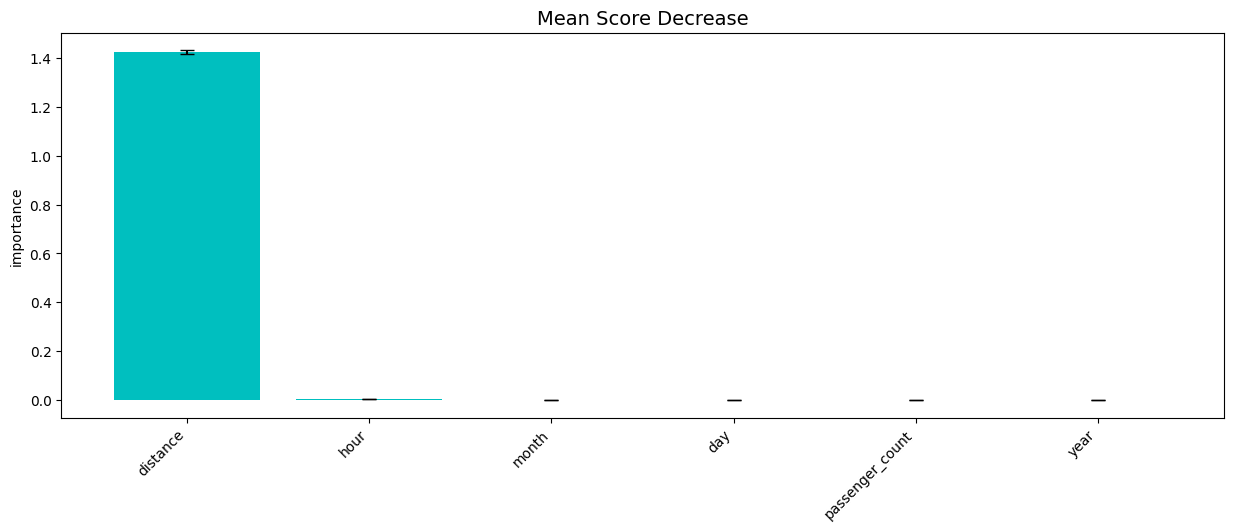

In [13]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

# Evaluation

In [14]:
from jcopml.plot import plot_residual

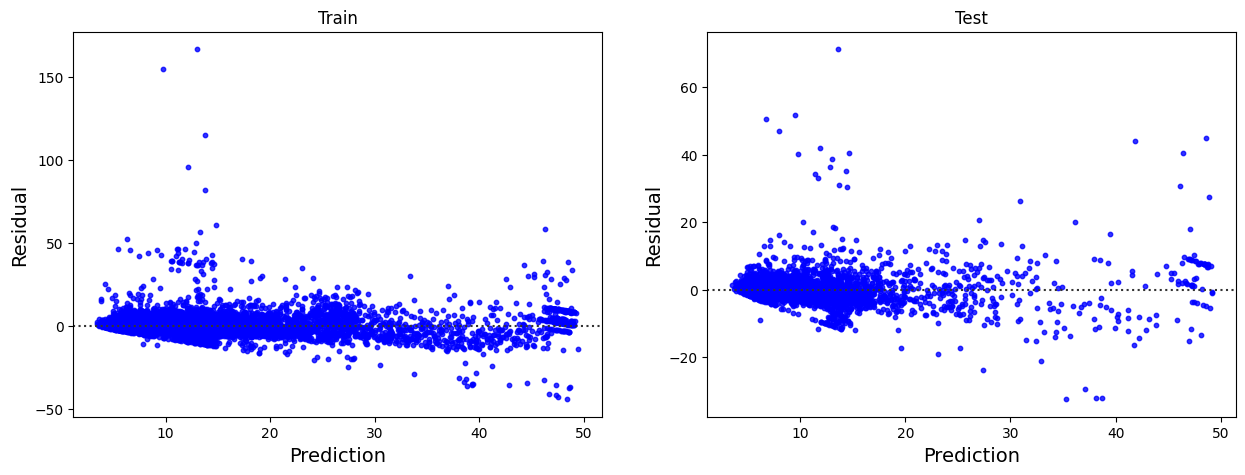

In [15]:
plot_residual(X_train, y_train, X_test, y_test, model)

Masih ada yang unbalance, cek datanya

In [16]:
df_analysis = X_train.copy()
pred = model.predict(X_train)
err = np.abs(pred-y_train)

df_analysis["fare"] = y_train
df_analysis["error"] = err

df_analysis.sort_values("error", ascending=False).head(10)

,passenger_count,year,month,day,hour,distance,fare,error
1335,1.0,2013,1,2,20,0.000000,180.00,166.982355
1483,1.0,2009,8,4,21,0.000416,165.00,155.268923
6630,1.0,2014,5,4,1,0.000000,128.83,115.046837
14142,1.0,2014,12,4,10,0.045860,108.00,95.862995
12915,1.0,2011,9,2,1,0.000000,96.00,82.187706
10524,1.0,2010,5,1,14,0.000000,75.80,60.963633
12349,1.0,2010,5,5,15,0.434492,104.67,58.396059
1494,1.0,2009,9,1,14,0.000031,70.00,56.731318
2432,1.0,2012,11,4,1,0.003817,58.60,52.301797
2346,1.0,2009,2,5,0,0.000000,63.00,50.088297
